In [1]:
import numpy as np

In [2]:
GLOBAL_PRECISION = 6

def FPI(func, currentPoint, maxIter=100):
    tolerance = 10**(-GLOBAL_PRECISION)
    count = 0
    newPoint = float('inf')
    while count < maxIter:
        count += 1
        try:
            newPoint = func(currentPoint)
        except OverflowError:
            print("OverflowError.")
            return None
        print(f"Iter of {count:2d}, newPoint: {newPoint}.")
        if abs(newPoint - currentPoint) <= tolerance: break
        currentPoint = newPoint
    print(f"FPI iterated of {count} times, with result: {newPoint:.{GLOBAL_PRECISION}f}")
    print(f"    Checking: {func(newPoint)-newPoint:.10f}\n")
    return newPoint


1. 使用不动点迭代求解方程，精确到小数点后8位。
$$
\begin{align}
&(a) x^3=2x+2\\
&(b) e^x+x=7\\
&(c) e^x+\sin x=4\\
\end{align}
$$

解：
$$
\begin{align}
&(a) 猜测不动点在2附近, 令g(x)=\sqrt[3]{2x+2}, g'(x)=\frac{2}{3}(2x+2)^{-\frac{2}{3}},|g'(2)|\approx 0.4477\lt 1\\
&(b) 猜测不动点在2附近, 令g(x)=\ln{(7-x)}, g'(x)=\frac{-1}{7-x},|g'(2)|= 0.2\lt 1\\
&(c) 猜测不动点在2附近, 令g(x)=\ln{(4-\sin x)}, g'(x)=\frac{-\cos x}{4-\sin x},|g'(2)|\approx 0.25\lt 1\\
\end{align}
$$

In [3]:
GLOBAL_PRECISION = 8
temp = FPI(lambda x: np.power(2*x+2, 1/3), 2)
temp = FPI(lambda x: np.log(7-x), 2)
temp = FPI(lambda x: np.log(4-np.sin(x)), 2)

Iter of  1, newPoint: 1.8171205928321397.
Iter of  2, newPoint: 1.7794200426869249.
Iter of  3, newPoint: 1.7714465799180181.
Iter of  4, newPoint: 1.7697510113798987.
Iter of  5, newPoint: 1.769390027058107.
Iter of  6, newPoint: 1.7693131549485797.
Iter of  7, newPoint: 1.7692967840640432.
Iter of  8, newPoint: 1.7692932976387314.
Iter of  9, newPoint: 1.7692925551504146.
Iter of 10, newPoint: 1.7692923970259369.
Iter of 11, newPoint: 1.769292363350857.
Iter of 12, newPoint: 1.7692923561792224.
FPI iterated of 12 times, with result: 1.76929236
    Checking: -0.0000000015

Iter of  1, newPoint: 1.6094379124341003.
Iter of  2, newPoint: 1.6846496628911718.
Iter of  3, newPoint: 1.6705989244116228.
Iter of  4, newPoint: 1.6732388633064061.
Iter of  5, newPoint: 1.672743386811923.
Iter of  6, newPoint: 1.6728363989518449.
Iter of  7, newPoint: 1.6728189391299018.
Iter of  8, newPoint: 1.6728222166326476.
Iter of  9, newPoint: 1.6728216013909811.
Iter of 10, newPoint: 1.6728217168820827.


2. 同上
$$
\begin{align}
&(a) x^5+x=1\\
&(b) \sin x=6x+5\\
&(c) \ln x+x^2=3\\
\end{align}
$$

In [4]:
# 分析过程省略
GLOBAL_PRECISION = 8
# FPI(lambda x: 1/(x**4+1), 0.7) # 0.7629688457215315 和 0.7469010736524949之间循环
temp = FPI(lambda x: (1-x)**0.2, 0.7)
temp = FPI(lambda x: (5-np.sin(x))/6, -1)
temp = FPI(lambda x: np.sqrt(3-np.log(x)), 2)

Iter of  1, newPoint: 0.7860030855966228.
Iter of  2, newPoint: 0.7346517243079815.
Iter of  3, newPoint: 0.7669432932004795.
Iter of  4, newPoint: 0.7472954208620871.
Iter of  5, newPoint: 0.7594909833949742.
Iter of  6, newPoint: 0.7520146003877128.
Iter of  7, newPoint: 0.7566329017439984.
Iter of  8, newPoint: 0.753793473261147.
Iter of  9, newPoint: 0.7555442631207562.
Iter of 10, newPoint: 0.7544666491445166.
Iter of 11, newPoint: 0.7551306499178112.
Iter of 12, newPoint: 0.7547217843996661.
Iter of 13, newPoint: 0.754973652444185.
Iter of 14, newPoint: 0.7548185372496165.
Iter of 15, newPoint: 0.7549140814133243.
Iter of 16, newPoint: 0.7548552361162152.
Iter of 17, newPoint: 0.7548914808873843.
Iter of 18, newPoint: 0.7548691573534696.
Iter of 19, newPoint: 0.7548829069639913.
Iter of 20, newPoint: 0.7548744383610765.
Iter of 21, newPoint: 0.7548796543527041.
Iter of 22, newPoint: 0.7548764417302057.
Iter of 23, newPoint: 0.7548784204483086.
Iter of 24, newPoint: 0.754877201718

3. 使用例1.6中的不动点迭代计算3和5的平方根，精确到小数点后8位。给出初始估计和所需要的迭代次数。

In [5]:
temp = FPI(lambda x: (x+3/x)/2, 1)
temp = FPI(lambda x: (x+5/x)/2, 1)

Iter of  1, newPoint: 2.0.
Iter of  2, newPoint: 1.75.
Iter of  3, newPoint: 1.7321428571428572.
Iter of  4, newPoint: 1.7320508100147274.
Iter of  5, newPoint: 1.7320508075688772.
FPI iterated of 5 times, with result: 1.73205081
    Checking: 0.0000000000

Iter of  1, newPoint: 3.0.
Iter of  2, newPoint: 2.3333333333333335.
Iter of  3, newPoint: 2.238095238095238.
Iter of  4, newPoint: 2.2360688956433634.
Iter of  5, newPoint: 2.236067977499978.
Iter of  6, newPoint: 2.23606797749979.
FPI iterated of 6 times, with result: 2.23606798
    Checking: 0.0000000000



4. 计算下列数字的立方根，使用不动点迭代精确到小数点后8位，写出初始估计和所需要的迭代次数。A为$(a)2,(b)3,(c)5$，用到的函数为
$$g(x)=\frac{2x+\frac{A}{x^2}}{3}$$

In [6]:
def g(a): return lambda x: (2*x+a/(x**2))/3
for A in [2, 3, 5]:
    cubeRoot = FPI(g(A), 1)
    print("cube checking: ", cubeRoot**3, '\n')

Iter of  1, newPoint: 1.3333333333333333.
Iter of  2, newPoint: 1.2638888888888888.
Iter of  3, newPoint: 1.259933493449977.
Iter of  4, newPoint: 1.2599210500177698.
Iter of  5, newPoint: 1.2599210498948732.
FPI iterated of 5 times, with result: 1.25992105
    Checking: 0.0000000000

cube checking:  2.0 

Iter of  1, newPoint: 1.6666666666666667.
Iter of  2, newPoint: 1.471111111111111.
Iter of  3, newPoint: 1.442812098249343.
Iter of  4, newPoint: 1.4422497895989996.
Iter of  5, newPoint: 1.4422495703074416.
Iter of  6, newPoint: 1.4422495703074085.
FPI iterated of 6 times, with result: 1.44224957
    Checking: 0.0000000000

cube checking:  3.000000000000001 

Iter of  1, newPoint: 2.3333333333333335.
Iter of  2, newPoint: 1.8616780045351475.
Iter of  3, newPoint: 1.722001880058607.
Iter of  4, newPoint: 1.7100597366002945.
Iter of  5, newPoint: 1.709975950782189.
Iter of  6, newPoint: 1.709975946676697.
FPI iterated of 6 times, with result: 1.70997595
    Checking: 0.0000000000

cub

5. 例1.3表明$g(x)=\cos x$使用FPI可收敛。对于函数$g(x)=\cos^2 x$是否也成立？找到不动点，精确到小数点后6位，写出迭代次数。使用定理1.6讨论局部收敛性。

解：$g'(x)=-2\cos{x}\sin{x}=-\sin{2x}\in [-1, 1]$，所以任意局部都收敛。

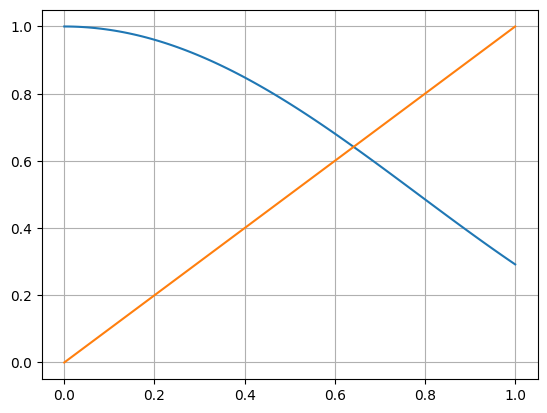

In [7]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 100)
plt.plot(x, np.cos(x)**2)
plt.plot(x, x)
axes = plt.gca()
axes.grid()
plt.show()

In [8]:
GLOBAL_PRECISION = 6
# temp = FPI(lambda x: np.cos(x)**2, 1)
# 因为交点附近g(x)的斜率绝对值很接近1，所以收敛很慢，默认的100次迭代不够，并不是不收敛
temp = FPI(lambda x: np.cos(x)**2, 1, 1000)

Iter of  1, newPoint: 0.2919265817264289.
Iter of  2, newPoint: 0.917172409958988.
Iter of  3, newPoint: 0.3697459228325515.
Iter of  4, newPoint: 0.8694055528480625.
Iter of  5, newPoint: 0.4163872933520556.
Iter of  6, newPoint: 0.8364128552102407.
Iter of  7, newPoint: 0.4490737725777865.
Iter of  8, newPoint: 0.8115299893073064.
Iter of  9, newPoint: 0.47388006893264434.
Iter of 10, newPoint: 0.7917517836915569.
Iter of 11, newPoint: 0.4936465506952193.
Iter of 12, newPoint: 0.7754754425852788.
Iter of 13, newPoint: 0.5099220694950325.
Iter of 14, newPoint: 0.7617493776555063.
Iter of 15, newPoint: 0.5236399694349675.
Iter of 16, newPoint: 0.74996432424254.
Iter of 17, newPoint: 0.5354041871329994.
Iter of 18, newPoint: 0.7397074829594285.
Iter of 19, newPoint: 0.5456271165745152.
Iter of 20, newPoint: 0.7306864832659663.
Iter of 21, newPoint: 0.5546025640173052.
Iter of 22, newPoint: 0.7226866709840424.
Iter of 23, newPoint: 0.5625472033889934.
Iter of 24, newPoint: 0.715545667350

6. 推导三种不同的g(x)，用不动点迭代计算f(x)=0，精确到小数点后6位。对于每个g(x)运行并报告结果，包括是否发散或者收敛。每个方程f(x)=0有三个根。如果需要的话推出更多的g(x)，直到利用FPI可以得到所有根。对于每个收敛运算，由误差$e_{i+1}/e_i$确定S的值，并和式1.11中使用微积分得到的S比较。
$$
\begin{align}
&(a) f(x)=2x^3-6x-1\\
&(b) f(x)=e^{x-2}+x^3-x\\
&(c) f(x)=1+5x-6x^3-e^{2x}\\
\end{align}
$$

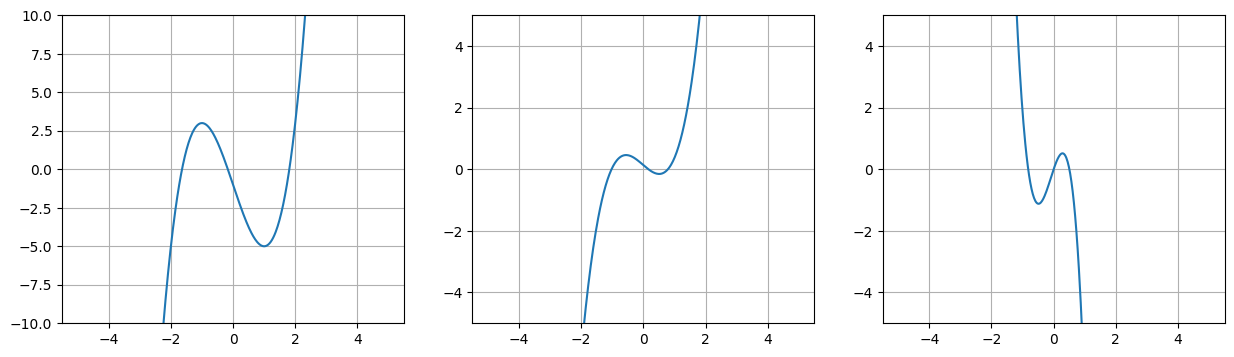

In [9]:
plt.figure(figsize=(15, 4))
x = np.linspace(-5, 5, 500)

plt.subplot(1, 3, 1)
plt.plot(x, x**3*2-6*x-1)
plt.ylim(-10.0, 10.0)
axes = plt.gca()
axes.grid()

plt.subplot(1, 3, 2)
plt.plot(x, np.exp(x-2)+x**3-x)
plt.ylim(-5.0, 5.0)
axes = plt.gca()
axes.grid()

plt.subplot(1, 3, 3)
plt.plot(x, 1+5*x-x**3*6-np.exp(2*x))
plt.ylim(-5.0, 5.0)
axes = plt.gca()
axes.grid()

plt.show()

In [10]:
# a
temp1 = FPI(lambda x: (2*x**3-1)/6, 1)
temp2 = FPI(lambda x: ((6*x+1)/2)**(1/3), 1)
temp3 = FPI(lambda x: 1/(2*x**2-6), 1)  # same as 1
temp4 = FPI(lambda x: np.sqrt((1/x+6)/2), -1)  # same as 2
temp5 = FPI(lambda x: (6/x+1/x**2)/2, -2, 1000)

# b c懒得做了

Iter of  1, newPoint: 0.16666666666666666.
Iter of  2, newPoint: -0.16512345679012344.
Iter of  3, newPoint: -0.16816740529326554.
Iter of  4, newPoint: -0.16825194022334902.
Iter of  5, newPoint: -0.1682543320964722.
Iter of  6, newPoint: -0.16825439980829027.
FPI iterated of 6 times, with result: -0.168254
    Checking: -0.0000000019

Iter of  1, newPoint: 1.5182944859378311.
Iter of  2, newPoint: 1.7162098190947073.
Iter of  3, newPoint: 1.7809334683532616.
Iter of  4, newPoint: 1.8011104675662613.
Iter of  5, newPoint: 1.8073089036894698.
Iter of  6, newPoint: 1.8092045700643036.
Iter of  7, newPoint: 1.8097835287643196.
Iter of  8, newPoint: 1.809960275706315.
Iter of  9, newPoint: 1.810014226877475.
Iter of 10, newPoint: 1.8100306945775446.
Iter of 11, newPoint: 1.8100357210101399.
Iter of 12, newPoint: 1.8100372552215327.
Iter of 13, newPoint: 1.810037723506335.
FPI iterated of 13 times, with result: 1.810038
    Checking: 0.0000001429

Iter of  1, newPoint: -0.25.
Iter of  2, n

7. 习题21考虑将不动点迭代用于$g(x)=1-5x+\frac{15}{2}x^2-\frac{5}{2}x^3=x$寻找初始估计，使得FPI能够：
    1. 在区间（0，1）中无穷循环；
    2. 在区间（1，2）中无穷循环；
    3. 无穷发散
    - 1和2是混沌动力学的例子。在所有三种情况中，FPI都不能成功运行。

解：
$g'(x)=-5+15x-\frac{15}{2}x^2, g'(0)=-5, g'(1)=\frac{5}{2}, g'(2)=-5$

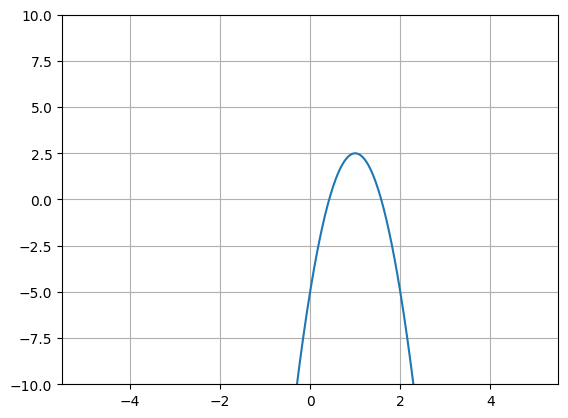

In [11]:
x = np.linspace(-5, 5, 500)
plt.plot(x, -5+15*x-15/2*x**2)
plt.ylim(-10.0, 10.0)
axes = plt.gca()
axes.grid()
plt.show()

In [12]:
FPI(lambda x: 1-5*x+15/2*x**2-5/2*x**3, 0.5, 1000)
FPI(lambda x: 1-5*x+15/2*x**2-5/2*x**3, 1.5, 1000)
FPI(lambda x: 1-5*x+15/2*x**2-5/2*x**3, 2.5, 1000)

Iter of  1, newPoint: 0.0625.
Iter of  2, newPoint: 0.7161865234375.
Iter of  3, newPoint: 0.3476193109245287.
Iter of  4, newPoint: 0.06318224949399502.
Iter of  5, newPoint: 0.7133981690924597.
Iter of  6, newPoint: 0.3423495454029034.
Iter of  7, newPoint: 0.0669651920499324.
Iter of  8, newPoint: 0.6980558306354092.
Iter of  9, newPoint: 0.3139604138186891.
Iter of 10, newPoint: 0.09211290084878257.
Iter of 11, newPoint: 0.6011174987822859.
Iter of 12, newPoint: 0.16145649133871598.
Iter of 13, newPoint: 0.37770683307014774.
Iter of 14, newPoint: 0.04672276563907779.
Iter of 15, newPoint: 0.7825038065626279.
Iter of 16, newPoint: 0.4819809393111807.
Iter of 17, newPoint: 0.05247028799142822.
Iter of 18, newPoint: 0.7579358995000234.
Iter of 19, newPoint: 0.4302991310709281.
Iter of 20, newPoint: 0.03800180249774571.
Iter of 21, newPoint: 0.8206848154373774.
Iter of 22, newPoint: 0.5661262607517099.
Iter of 23, newPoint: 0.11950359898861046.
Iter of 24, newPoint: 0.5053237211836401.